# Conhecendo os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\enama\OneDrive\Alura\Data Science\Machine Learning com Python Classificação\4. Classificação otimizando modelos de machine learning\dados_inadimplencia.csv')
df.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [4]:
df['inadimplente'].value_counts(normalize=True).round(4)*100

inadimplente
0    67.65
1    32.35
Name: proportion, dtype: float64

# Separando os dados

In [5]:
x = df.drop('inadimplente', axis=1)
y = df['inadimplente']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier

In [9]:
modelo_dt = DecisionTreeClassifier(random_state=42,
                                   max_depth=3)

modelo_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_test, modelo_dt.predict(x_test))
print(f'recall do DT: {recall_dt:.3f}')

recall do DT: 0.143


# LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logistic_pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [13]:
recall_lr = recall_score(y_test, logistic_pipeline.predict(x_test))
print(f'recall do LR: {recall_lr:.3f}')

recall do LR: 0.253


# GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

## DecisionTreeClassifier com GridSerachCV

In [15]:
import numpy as np

param_grid_dt={
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [16]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(shuffle=True, random_state=42)

dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='recall',
    n_jobs=-1,
    cv=cv
)

dt_grid_search.fit(x_train, y_train)

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

### Obtendo informações do GridSearchCV

In [17]:
# Melhores hiperparametros de acordo com o GridSearchCV

dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(12),
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(15),
 'min_samples_split': np.int64(5),
 'splitter': 'best'}

In [18]:
# Gerar uma DF com os resultados do GridSearchCV

df_cv_results_dt = pd.DataFrame(dt_grid_search.cv_results_)
df_cv_results_dt.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012241,0.001518,0.004853,0.000655,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.006718,0.000596,0.003610,0.000850,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.011123,0.001682,0.004305,0.000749,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251


In [19]:
# Selecionando, dentro da DF gerada acima, o index onde apresenta os melhores hiperparametros (mesmos dados do `.best_params_`)

df_cv_results_dt.loc[[dt_grid_search.best_index_]]

# Importante procurar o 'mean_test_score', para validar o quanto a performance melhorou ou piorou

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.015206,0.001178,0.003478,0.000792,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


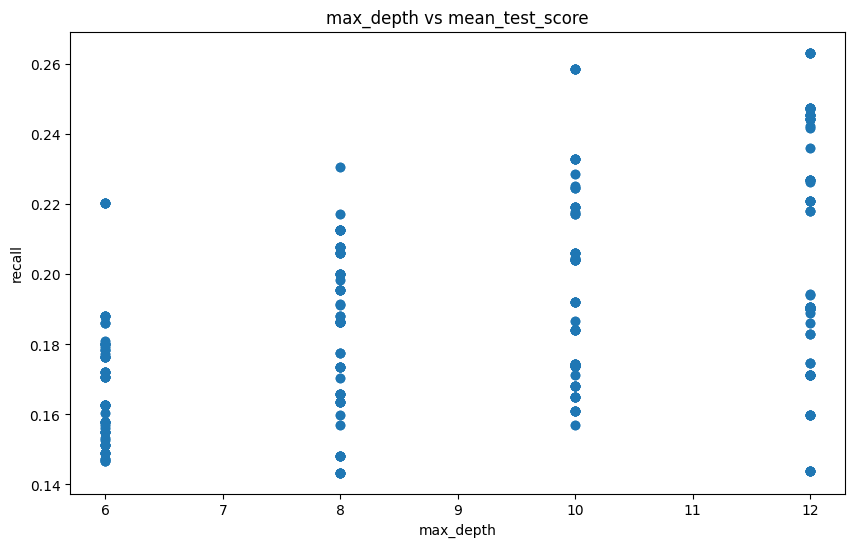

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    df_cv_results_dt['param_max_depth'],
    df_cv_results_dt['mean_test_score']
)

plt.title('max_depth vs mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.show()

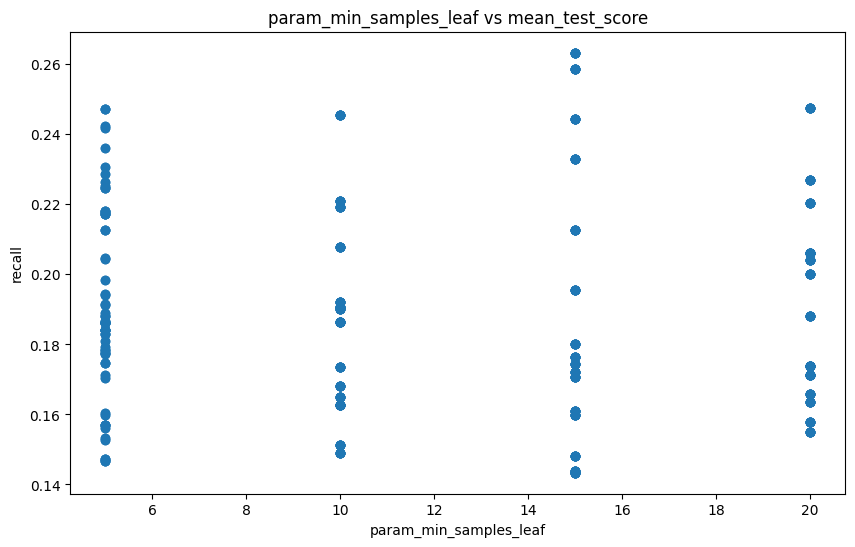

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(
    df_cv_results_dt['param_min_samples_leaf'],
    df_cv_results_dt['mean_test_score']
)

plt.title('param_min_samples_leaf vs mean_test_score')
plt.xlabel('param_min_samples_leaf')
plt.ylabel('recall')
plt.show()

In [22]:
import plotly.express as px

fig = px.scatter(
    df_cv_results_dt,
    x='param_criterion',
    y='mean_test_score',
)

fig.show();

In [23]:
fig = px.scatter(
    df_cv_results_dt,
    x='param_max_features',
    y='mean_test_score',
)

fig.show();

In [24]:
fig = px.scatter(
    df_cv_results_dt,
    x='param_min_samples_split',
    y='mean_test_score',
)

fig.show();

In [25]:
fig = px.scatter(
    df_cv_results_dt,
    x='param_splitter',
    y='mean_test_score',
)

fig.show();

## LogisticRegression com GridSearchCV

In [26]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver': ['newton-cg', 'lbfgs'],
     'logisticregression__penalty': ['l2'],
     'logisticregression__max_iter': max_iter,
     'logisticregression__C': c},
    {'logisticregression__solver': ['liblinear'],
     'logisticregression__penalty': ['l1', 'l2'],
     'logisticregression__max_iter': max_iter,
     'logisticregression__C': c}
]

In [27]:
lr_grid_search = GridSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    param_grid=param_grid_lr,
    scoring='recall',
    n_jobs=-1,
    cv=cv
)

lr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [28]:
lr_grid_search.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__max_iter': np.int64(100),
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [29]:
# Gerar uma DF com os resultados do GridSearchCV

df_cv_results_lr = pd.DataFrame(lr_grid_search.cv_results_)
df_cv_results_lr.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012051,0.001794,0.003215,0.000394,0.001,100,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
1,0.007229,0.000720,0.002631,0.000797,0.001,100,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.113924,0.087025,0.079114,0.096835,0.012313,91
2,0.009039,0.000443,0.002709,0.000400,0.001,150,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86


In [30]:
# Selecionando, dentro da DF gerada acima, o index onde apresenta os melhores hiperparametros (mesmos dados do `.best_params_`)

df_cv_results_lr.loc[[lr_grid_search.best_index_]]

# Importante procurar o 'mean_test_score', para validar o quanto a performance melhorou ou piorou

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.013011,0.001207,0.004257,0.000593,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


In [31]:
fig = px.scatter(
    df_cv_results_lr,
    x='param_logisticregression__max_iter',
    y='mean_test_score',
)

fig.show()

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy import linspace

In [33]:
param_grid_knn = {
    'knn__n_neighbors': linspace(5, 25, 10, dtype=int),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'],
}

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


In [34]:
knn_grid_search = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid_knn,
    scoring='recall',
    n_jobs=-1,
    cv=cv
)

knn_grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': array([ 5,  7,  9, 11, 13, 16, 18, 20, 22, 25]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall')

In [35]:
knn_grid_search.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': np.int64(5),
 'knn__weights': 'distance'}

In [36]:
df_cv_results_knn = pd.DataFrame(knn_grid_search.cv_results_)
df_cv_results_knn.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015393,0.001142,0.351234,0.066365,euclidean,5,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.327532,0.324367,0.363924,0.324367,0.294304,0.326899,0.022120,10
1,0.015725,0.000635,0.239460,0.021111,euclidean,5,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.371835,0.362342,0.379747,0.351266,0.318038,0.356646,0.021524,2
2,0.015621,0.000864,0.388145,0.043345,euclidean,7,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.310127,0.306962,0.337025,0.316456,0.319620,0.318038,0.010496,15


In [37]:
df_cv_results_knn.loc[[knn_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.016575,0.000717,0.33941,0.036022,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.375,0.370253,0.373418,0.356013,0.357595,0.366456,0.008043,1


In [38]:
figure = px.scatter(
    df_cv_results_knn,
    x='param_knn__n_neighbors',
    y='mean_test_score',
)

figure.show()

# Nested Cross Validation (Validação Cruzada Aninhada)

## Nested Cross Validation - DecisionTreeClassifier

In [39]:
inner_cv = StratifiedKFold(shuffle=True, random_state=42)

outer_cv = StratifiedKFold(shuffle=True, random_state=42, n_splits=3)

In [40]:
# Importando o cross_val_score, para a outer validation
from sklearn.model_selection import cross_val_score

# Inner validation do GridSearch para DecisionTreeClassifier
dt_nested_gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv
)

dt_nested_scores = cross_val_score(
    estimator=dt_nested_gs,
    X=x_train,
    y=y_train,
    cv=outer_cv
)

In [41]:
print(f'Resultado de cada iteração do cv externo: {dt_nested_scores}')
print(f'Média: {dt_nested_scores.mean()}')

Resultado de cada iteração do cv externo: [0.23646724 0.24762808 0.20512821]
Média: 0.2297411750289676


## Nested Cross Validation - LogisticRegression

In [42]:
# Inner validation do GridSearch para LogisticRegression

lr_nested_gs = lr_grid_search = GridSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    param_grid=param_grid_lr,
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv
)

lr_nested_score = cross_val_score(
    estimator=lr_nested_gs,
    X=x_train,
    y=y_train,
    cv=outer_cv
)

In [43]:
print(f'Resultado de cada iteração do cv externo: {lr_nested_score}')
print(f'Média: {lr_nested_score.mean()}')

lr_nested_gs.fit(x_train, y_train)
print(f'Melhores hiperpamâmtros: {lr_nested_gs.best_params_}')

Resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]
Média: 0.2537901108426093
Melhores hiperpamâmtros: {'logisticregression__C': 0.001, 'logisticregression__max_iter': np.int64(100), 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


# Randomized Search CV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

## Decision Tree Classifier

In [45]:
rs_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    n_iter=100,
    scoring="recall",
    n_jobs=-1,
    cv=inner_cv,
    random_state=42,
)

rs_dt_nested_scores = cross_val_score(rs_dt, x_train, y_train, cv=outer_cv)

In [46]:
print(f'Resultado de cada iteração do cv externo: {rs_dt_nested_scores}')
print(f'Média: {rs_dt_nested_scores.mean()}')

Resultado de cada iteração do cv externo: [0.23646724 0.18975332 0.21272555]
Média: 0.21298203440307595


In [47]:
rs_dt.fit(x_train, y_train)
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': np.int64(5),
 'min_samples_leaf': np.int64(15),
 'max_features': 'sqrt',
 'max_depth': np.int64(12),
 'criterion': 'gini'}

## LogisticRegression

In [48]:
rs_lr = RandomizedSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    param_distributions=param_grid_lr,
    n_iter=50,
    scoring="recall",
    n_jobs=-1,
    cv=inner_cv,
    random_state=42,
)

rs_lr_nested_scores = cross_val_score(rs_lr, x_train, y_train, cv=outer_cv)

print(f'Resultado de cada iteração do cv externo: {rs_lr_nested_scores}')
print(f'Média: {rs_lr_nested_scores.mean()}')

Resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]
Média: 0.2537901108426093


In [49]:
rs_lr.fit(x_train, y_train)
rs_lr.best_params_

{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': np.int64(150),
 'logisticregression__C': 0.001}

In [50]:
### More

In [51]:
# Número de tentativas aleatórias
NUM_TRIALS = 30

# Definindo a grade de hiperparâmetros
p_grid = {"max_depth": [10, 20, 30, 40], 
          "min_samples_split": [2, 5, 10], 
          "min_samples_leaf": [1, 2, 4]}  

dt_classifier = DecisionTreeClassifier(random_state=42)

# Arrays para armazenar as pontuações.
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop para cada tentativa
for i in range(NUM_TRIALS):
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)

    # Pesquisa e pontuação de parâmetros não aninhados
    clf = RandomizedSearchCV(estimator=dt_classifier, 
                             param_distributions=p_grid, 
                             cv=outer_cv, 
                             n_iter=18, 
                             random_state=i)
    clf.fit(x_train, y_train)
    non_nested_scores[i] = clf.best_score_

    # CV aninhado com otimização de parâmetros
    clf = RandomizedSearchCV(estimator=dt_classifier, 
                             param_distributions=p_grid, 
                             cv=inner_cv, 
                             n_iter=18, 
                             random_state=i)
    nested_score = cross_val_score(clf, X=x_train, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [52]:
score_difference = non_nested_scores - nested_scores

# Cria um DataFrame para armazenar os escores
df = pd.DataFrame({
    'Trial': range(NUM_TRIALS),
    'Non-Nested CV Score': non_nested_scores,
    'Nested CV Score': nested_scores,
    'Score Difference': score_difference
})

# Cria um gráfico de linha para os escores de CV aninhados e não aninhados
fig = px.line(df, x='Trial', y=['Non-Nested CV Score', 'Nested CV Score'],
                 labels={'value': 'Escore', 'variable': 'Tipo de CV', 'Trial': 'Tentativa Individual #'},
               title='Validação Cruzada Não Aninhada e Aninhada')
fig.show()

# Cria um gráfico de barras para a diferença de scores
fig = px.bar(df, x='Trial', y='Score Difference',
             labels={'Score Difference': 'diferença de escores', 'Trial': 'Tentativa Individual #'},
             title='Diferença de Escores entre CV Não Aninhado e Aninhado')
fig.show()

# Otimização Bayesiana

## DecisionTreeClassifier

In [53]:
from skopt.space import Real, Integer, Categorical

space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12),
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}

In [54]:
from skopt import BayesSearchCV

In [55]:
opt_dt = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=space_dt,
    n_iter=50,
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv,
    random_state=42,
)

bs_dt_nested_scores = cross_val_score(opt_dt, x_train, y_train, cv=outer_cv)

print(f'Resultado de cada iteração do cv externo: {bs_dt_nested_scores}')
print(f'Média: {bs_dt_nested_scores.mean()}');

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.str_('gini'), np.int64(12), np.str_('log2'), np.int64(5), np.int64(5), np.str_('best')] before, using random point ['gini', np.int64(11), 'log2', np.int64(8), np.int64(11), 'random']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Li

Resultado de cada iteração do cv externo: [0.25949367 0.2278481  0.19620253 0.20886076]
Média: 0.2231012658227848


In [56]:
opt_dt.fit(x_train, y_train)
opt_dt.best_params_

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



OrderedDict([('criterion', 'entropy'),
             ('max_depth', 11),
             ('max_features', 'log2'),
             ('min_samples_leaf', 5),
             ('min_samples_split', 6),
             ('splitter', 'best')])

## LogisticRegression

In [57]:
max_iter = Integer(100, 300)
c = Categorical([0.001, 0.01, 0.1, 1, 10])

space_lr = [
    {
        'logisticregression__solver': Categorical(['newton-cg', 'lbfgs']),
        'logisticregression__penalty': Categorical(['l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
    {
        'logisticregression__solver': Categorical(['liblinear']),
        'logisticregression__penalty': Categorical(['l1', 'l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
]

In [58]:
opt_lr = BayesSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    search_spaces=space_lr,
    n_iter=50,
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv,
    random_state=42, 
)

bs_lr_nested_scores = cross_val_score(opt_lr, x_train, y_train, cv=outer_cv)

print(f'Resultado de cada iteração do cv externo: {bs_lr_nested_scores}')
print(f'Média: {bs_lr_nested_scores.mean()}');

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The

Resultado de cada iteração do cv externo: [0.26835443 0.23797468 0.2443038  0.2556962 ]
Média: 0.25158227848101267


In [59]:
opt_lr.fit(x_train, y_train)
opt_lr.best_params_

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']



OrderedDict([('logisticregression__C', 0.001),
             ('logisticregression__max_iter', 150),
             ('logisticregression__penalty', 'l2'),
             ('logisticregression__solver', 'liblinear')])

In [60]:
opt_lr.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

## KNN

In [62]:
space_knn = {
    'knn__n_neighbors': Integer(5, 25),
    'knn__weights': Categorical(['uniform', 'distance']),
    'knn__metric': Categorical(['euclidean', 'manhattan']),
}

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [63]:
opt_knn = BayesSearchCV(
    estimator=pipe_knn,
    search_spaces=space_knn,
    n_iter=50,
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv,
    random_state=42, 
)

bs_knn_nested_scores = cross_val_score(opt_lr, x_train, y_train, cv=outer_cv)

print(f'Resultado de cada iteração do cv externo: {bs_knn_nested_scores}')
print(f'Média: {bs_knn_nested_scores.mean()}');

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The

Resultado de cada iteração do cv externo: [0.26835443 0.23797468 0.2443038  0.2556962 ]
Média: 0.25158227848101267
